We are exploring data of a local zoo. The caretakers who manage the penguin habitats are having trouble keeping their population adequately fed. They're hoping to find out if certain features of the birds are related to body mass to better manage their feeding routines.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load dataset
penguins = sns.load_dataset("penguins")

# Examine first 5 rows of dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [2]:
# Subset data
penguins = penguins[["body_mass_g", "bill_length_mm", "sex", "species"]]

# Rename columns
penguins.columns = ["body_mass_g", "bill_length_mm", "gender", "species"]

# Drop rows with missing values
penguins.dropna(inplace=True)

# Reset index
penguins.reset_index(inplace=True, drop=True)

In [3]:
# Examine first 5 rows of data
penguins.head()

,body_mass_g,bill_length_mm,gender,species
0,3750.0,39.1,MALE,Adelie
1,3800.0,39.5,FEMALE,Adelie
2,3250.0,40.3,FEMALE,Adelie
3,3450.0,36.7,FEMALE,Adelie
4,3650.0,39.3,MALE,Adelie


In [4]:
# Subset X and y variables
penguins_X = penguins[["bill_length_mm", "gender", "species"]]
penguins_y = penguins[["body_mass_g"]]

In [5]:
# Import train-test-split function from sci-kit learn
from sklearn.model_selection import train_test_split

In [6]:
# Create training data sets and holdout (testing) data sets
X_train, X_test, y_train, y_test = train_test_split(penguins_X, penguins_y, 
                                                    test_size = 0.3, random_state = 42)

# model construction

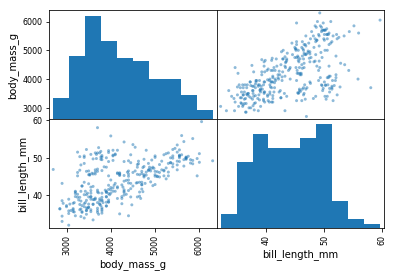

In [7]:
#Create pairwise scatterplots of data set
pd.plotting.scatter_matrix(penguins);
plt.show()

In [8]:
# Write out OLS formula as a string
ols_formula = "body_mass_g ~ bill_length_mm + C(gender) + C(species)"

In [9]:
# Import ols() function from statsmodels package
from statsmodels.formula.api import ols

In [10]:
# Create OLS dataframe
ols_data = pd.concat([X_train, y_train], axis = 1)

# Create OLS object and fit the model
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

# Model assumption: Linearity

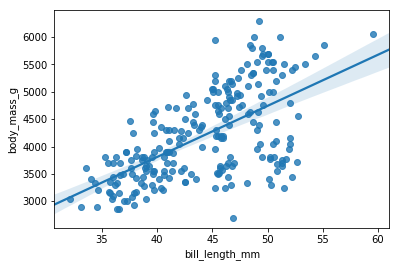

In [11]:
sns.regplot(x = "bill_length_mm", y = "body_mass_g", data = ols_data)

# Model asumption: Independent observations

 The independent observations assumption is more about data collection. There is no reason to believe that one penguin's body mass or bill length would be related to any other penguin's anatomical measurements. So we can check off assumptions 1 and 2.

# The normality assumption

# The homoscedasticity assumption

The normality and homoscedasticity assumptions focus on the distribution of errors. Thus, we can only check these assumptions after we have constructed the model. To check these assumptions, we will check the residuals, as an approximation of the errors.

In [12]:

# Get predictions from model
fitted_values = model.predict(penguins_X)

In [13]:
# Calculate residuals
residuals = model.resid

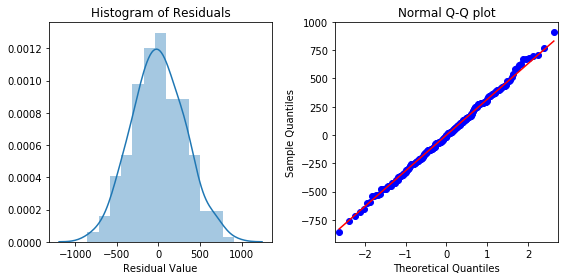

In [14]:
#normality
# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals.
sns.distplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.
sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("Normal Q-Q plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()
plt.show()

The histogram of the residuals are approximately normally distributed, which supports that the normality assumption is met for this model.The residuals in the Q-Q plot form a straight line, further supporting that the normality assumption is met.

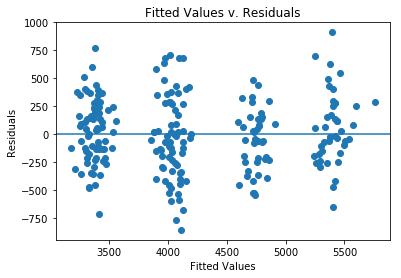

In [15]:
#homoscedasticity
# Create a scatterplot with the fitted values from the model and the residuals.

plt.scatter(x = model.fittedvalues, y = model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted Values v. Residuals")
plt.axhline(0)
plt.show()

The variance of the residuals is consistant across all variables of X. Thus, the assumption of homoscedasticity is met.

# Model evaluation and interpretation

In [16]:
# Get model results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     322.6
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           1.31e-92
Time:                        20:23:23   Log-Likelihood:                -1671.7
No. Observations:                 233   AIC:                             3353.
Df Residuals:                     228   BIC:                             3371.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2032.2111    354.087      5.739      0.000    1334.510    2729.913
C(gender)[T.MALE]         528.9508     55.105      9.599      0.000     420.371     637.531
C(species)[T.Chinstrap]  -285.3865    106.339     -2.684      0.008    -494.920     -75.853
C(species)[T.Gentoo]     1081.6246     94.953     11.391      0.000     894.526    1268.723
bill_length_mm             35.5505      9.493      3.745      0.000      16.845      54.256
==============================================================================
Omnibus:                        0.339   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.436
Skew:                           0.084   Prob(JB):                        0.804
Kurtosis:                       2.871   Cond. No.                         798.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-  An R-squared of 0.85 is fairly high, and this means that 85% of the variation in body mass (g) is explained by the model.

- Based on the p-value column, labeled P>|t|, we can tell that all of the X variables are statistically significant, since the p-value is less than 0.05 for every X variable.

- C(gender) - Male

Given the name of the variable, we know that the variable was encoded as Male = 1, Female = 0. This means that female penguins are the reference point. If all other variables are constant, then we would expect a male penguin's body mass to be about 528.95 grams more than a female penguin's body mass.

- C(species) - Chinstrap and Gentoo

Given the names of these two variables, we know that Adelie penguins are the reference point. So, if we compare an Adelie penguin and a Chinstrap penguin, who have the same characteristics except their species, we would expect the Chinstrap penguin to have a body mass of about 285.39 grams less than the Adelie penguin. If we compare an Adelie penguin and a Gentoo penguin, who have the same characteristics except their species, we would expect the Gentoo penguin to have a body mass of about 1,081.62 grams more than the Adelie penguin

- Bill length (mm)

Lastly, bill length (mm) is a continuous variable, so if we compare two penguins who have the same characteristics, except one penguin's bill is 1 millimeter longer, we would expect the penguin with the longer bill to have 35.55 grams more body mass than the penguin with the shorter bill.